# SEM TEXT ANALYSIS

### Import Packages

In [18]:
%run cluster.py

### Import Data

In [2]:
# Importing Ref DataFrame
filepath = relative_path / "Data" / "nationalDataDict.xlsx"
data_ref = pd.read_excel(filepath, sheet_name='Dictionary', usecols='A:D')
data_ref.columns = [c.lower().replace(' ', '_') for c in data_ref.columns]
print("Imported Ref Data.")

# Import Raw Data
filepath = relative_path / "Data" / "nationalDataRaw.parquet"
data_raw = pd.read_parquet(filepath)
print("Imported Raw Data.")
print('Raw Data Before Filter: ', data_raw.shape)

# Clean Data
data_clean = clean_data(data_raw.copy())
print('Clean Data After Filter: ', data_clean.shape)
data_clean.head()

# Other Frames
filepath = relative_path / "Data" / "codedData.parquet"
coded_data = pd.read_parquet(filepath)
filepath = relative_path / "Data" / "parkInformationGeodesic.xlsx"
geodesic_park_information = pd.read_excel(filepath, index_col=0)

Imported Ref Data.
Imported Raw Data.
Raw Data Before Filter:  (28082, 346)
Clean Data After Filter:  (19977, 338)


In [3]:
coded_data.head()

orig_index     n_IQualtricsID s_QualtricsLang s_residence  n_loczip  \
0           0  R_5ZzD8xdz24Bx17j              EN          No       NaN   
1           1  R_fvd9VW1Y8umSWOW              EN          No       NaN   
2           2  R_2Nnte2VxZyBU1Er              EN          No       NaN   
3           3  R_efmlxcfYDsQNzoJ              EN          No       NaN   
4           4  R_6pb7kqH2oedoEzZ              EN          No       NaN   

  s_us_int s_country_int  n_zip_int s_primary  \
0      Yes          None    76107.0       Yes   
1      Yes          None    78130.0       Yes   
2      Yes          None    76643.0       Yes   
3      Yes          None    99349.0        No   
4      Yes          None    41035.0        No   

                           s_purpose  ...  x_user_place_name  \
0                               None  ...         Fort Worth   
1                               None  ...      New Braunfels   
2                               None  ...             Hewitt   
3  An incidental or spontaneous stop  ...            Mattawa   
4  An incidental or spontaneous stop  ...          Dry Ridge   

  x_user_state_name x_user_state_code x_user_county_name x_user_latitude  \
0             Texas                TX            Tarrant         32.7392   
1             Texas                TX              Comal         29.7229   
2             Texas                TX           McLennan         31.4582   
3        Washington                WA              Grant         46.7310   
4          Kentucky                KY              Grant         38.7049   

  x_user_longitude  x_distance_traveled  x_race  x_user_continent  \
0         -97.3852            461.96144   White              None   
1         -98.0742           448.322379   White              None   
2         -97.1966           472.597062    None              None   
3        -119.7783          1286.597608   White              None   
4         -84.6237          1251.911653   Other              None   

                x_user_mainland  
0  Show only Mainland US States  
1  Show only Mainland US States  
2  Show only Mainland US States  
3  Show only Mainland US States  
4  Show only Mainland US States  

[5 rows x 351 columns]

### Number of columns that start with 's_'

In [4]:
len([x for x in coded_data.columns if x.startswith('s_')])
len(coded_data.columns)

351

### Listing all Variable Names

In [5]:
for col in coded_data.columns:
    print('\'', col, '\', ', sep='')

'orig_index', 
'n_IQualtricsID', 
's_QualtricsLang', 
's_residence', 
'n_loczip', 
's_us_int', 
's_country_int', 
'n_zip_int', 
's_primary', 
's_purpose', 
'n_locdays', 
's_overnight', 
'm_accom_camp', 
'm_accom_ocamp', 
'm_accom_olodge', 
'm_accom_unpaid', 
'n_nightscamp', 
'n_nightsocamp', 
'n_nightsolodge', 
'n_nightsunpaid', 
'n_arrive', 
's_arrive', 
'n_depart', 
's_depart', 
'n_adults', 
'n_children', 
'n_adage_1', 
'n_adage_2', 
'n_adage_3', 
'n_adage_4', 
'n_adage_5', 
'n_adage_6', 
'n_cage_1', 
'n_cage_2', 
'n_cage_3', 
'n_cage_4', 
'n_cage_5', 
'n_cage_6', 
'n_split', 
'o_comm', 
'o_commstay1', 
'o_commstay2', 
's_visit', 
's_hour', 
'n_hours', 
'n_minutes', 
'n_days', 
'n_diffdays', 
's_reenter', 
'n_times', 
's_entermode', 
'o_entermode', 
's_enterwater', 
'o_enterwater', 
'n_carnum', 
'n_rvnum', 
'n_motonum', 
's_commercial', 
'n_commcost', 
'n_commlength', 
's_commlodge', 
'n_commpeople', 
's_first', 
'n_yearvisit', 
'n_fivevisit', 
'n_othervisit', 
's_mailback', 
'n_ID',

### Update Geodesic Data and Re-Code Data

In [7]:
# update_geodesic_park_data(coded_data) # WARNING THIS TAKES A FEW MINUTES TO RUN                       LAST RUN: 2023-12-28 14:45:00
# code_data(data_clean, data_ref, save=True, geodesic_park_information=geodesic_park_information) # WARNING THIS TAKES A FEW MINUTES TO RUN        LAST RUN: 2023-12-28 14:45:00

Added the users geodesic data.
Data Coded.
Saving Data(.parquet)...
Saving Data(.xlsx)...
SUCCESS: codedData Data Saved.


### Un-pivot Data

In [8]:
xbi_info = pd.melt(coded_data, id_vars=['n_IQualtricsID', 'weight_peak'], value_vars=['m_info_none', 
                    'm_info_previous', 
                    'm_info_friends', 
                    'm_info_call', 
                    'm_info_site', 
                    'm_info_osite', 
                    'm_info_local', 
                    'm_info_maps', 
                    'm_info_news', 
                    'm_info_units', 
                    'm_info_school', 
                    'm_info_social', 
                    'm_info_center', 
                    'm_info_tele', 
                    'm_info_ota', 
                    'm_info_book', 
                    'm_info_cruise', 
                    'm_info_grew', 
                    'm_info_other'], var_name='xbi_info', value_name='xbi_info_value')
xbi_info.dropna(subset=['xbi_info_value'], inplace=True)
xbi_info = xbi_info.replace({'m_info_none': 'Did not obtain infomation prior to visit', 
                    'm_info_previous': 'Previous visits', 
                    'm_info_friends': 'Friends/relatives/word of mouth', 
                    'm_info_call': 'Inquiry to park via phone/mail/email', 
                    'm_info_site': 'Official Park website', 
                    'm_info_osite': 'Other website', 
                    'm_info_local': 'Local businesses', 
                    'm_info_maps': 'Maps/brochures', 
                    'm_info_news': 'Newspaper/magazine articles', 
                    'm_info_units': 'Other units of the National Park System', 
                    'm_info_school': 'School class/program', 
                    'm_info_social': 'Social media', 
                    'm_info_center': 'State welcome center/visitor bureaus/chamber of commerce', 
                    'm_info_tele': 'Television/radio programs/DVDs', 
                    'm_info_ota': 'Online travel agent', 
                    'm_info_book': 'Travel guides/tour books', 
                    'm_info_cruise': 'Cruise ship', 
                    'm_info_grew': 'Live here/grew up here', 
                    'm_info_other': 'Other',
                    'Not Selected': 0,
                    'Selected': 1})
xbi_info.reset_index(drop=True)
xbi_info['xbi_info_value'] = np.where(xbi_info['xbi_info_value'] == 1, xbi_info['weight_peak'], np.float64(0))

xbi_prog = pd.melt(coded_data, id_vars=['n_IQualtricsID', 'weight_peak'], value_vars=['m_prog_rangerled', 
                    'm_prog_talkrang', 
                    'm_prog_outdoorex', 
                    'm_prog_indoorex', 
                    'm_prog_demo', 
                    'm_prog_brochure', 
                    'm_prog_center', 
                    'm_prog_movies', 
                    'm_prog_junior', 
                    'm_prog_jrself', 
                    'm_prog_stamp', 
                    'm_prog_audio', 
                    'm_prog_app', 
                    'm_prog_other'], var_name='xbi_prog', value_name='xbi_prog_value')
xbi_prog.dropna(subset=['xbi_prog_value'], inplace=True)
xbi_prog = xbi_prog.replace({'m_prog_rangerled': 'Attending a ranger-led activity, such as a tour or talk', 
                    'm_prog_talkrang': 'Talking informally with a ranger', 
                    'm_prog_outdoorex': 'Viewing outdoor exhibits', 
                    'm_prog_indoorex': 'Viewing indoor exhibits', 
                    'm_prog_demo': 'Attending a cultural demonstration or performance', 
                    'm_prog_brochure': 'Reading the park brochure or newspaper', 
                    'm_prog_center': 'Going to a visitor center', 
                    'm_prog_movies': 'Watching movies or videos about the park', 
                    'm_prog_junior': 'Participating with a child in your group in the Junior Ranger program', 
                    'm_prog_jrself': 'Participating in the Junior Ranger program', 
                    'm_prog_stamp': 'Obtaining a National Park passport stamp', 
                    'm_prog_audio': 'Listening to an audio tour or podcast', 
                    'm_prog_app': 'Using the National Park Service App', 
                    'm_prog_other': 'Other',
                    'Not Selected': 0,
                    'Selected': 1})
xbi_prog.reset_index(drop=True)
xbi_prog['xbi_prog_value'] = np.where(xbi_prog['xbi_prog_value'] == 1, xbi_prog['weight_peak'], np.float64(0))

xbi_age = pd.melt(coded_data, id_vars=['n_IQualtricsID', 'weight_peak'], value_vars=['n_adage_1', 
                    'n_adage_2', 
                    'n_adage_3', 
                    'n_adage_4', 
                    'n_adage_5', 
                    'n_adage_6', 
                    'n_cage_1', 
                    'n_cage_2', 
                    'n_cage_3', 
                    'n_cage_4', 
                    'n_cage_5', 
                    'n_cage_6'], var_name='xbi_age', value_name='xbi_age_value')
xbi_age.dropna(subset=['xbi_age_value'], inplace=True)
xbi_age['xbi_age_group'] = xbi_age['xbi_age_value'].apply(slice_age_groups)
xbi_age['xbi_age_group_pos'] = xbi_age['xbi_age_group'].apply(add_group_positions, positions=age_group_positions)

xbi_visitor_age = coded_data[['n_IQualtricsID', 'c_years']].copy()
xbi_visitor_age.dropna(subset=['c_years'], inplace=True)
xbi_visitor_age['xbi_age_group_pos'] = xbi_visitor_age['c_years'].apply(add_group_positions, positions=visitor_age_group_positions)
#r_motiv columns
xbi_motiv = pd.melt(coded_data, id_vars='n_IQualtricsID', value_vars=['r_motiv_visit', 
                    'r_motiv_solitude', 
                    'r_motiv_sounds', 
                    'r_motiv_learn', 
                    'r_motiv_history', 
                    'r_motiv_family', 
                    'r_motiv_exercise', 
                    'r_motiv_wildlife', 
                    'r_motiv_relax', 
                    'r_motiv_stars', 
                    'r_motiv_other'], var_name='xbi_motiv', value_name='xbi_motiv_value')
xbi_motiv.dropna(subset=['xbi_motiv_value'], inplace=True)
xbi_motiv = xbi_motiv.replace({'r_motiv_visit': 'To visit a National Park Service site', 
                    'r_motiv_solitude': 'To experience solitude', 
                    'r_motiv_sounds': 'To hear the sounds of nature/quiet', 
                    'r_motiv_learn': 'To learn more about nature', 
                    'r_motiv_history': 'To learn more about American history and culture', 
                    'r_motiv_family': 'To spend time with family/friends', 
                    'r_motiv_exercise': 'To get physical exercise', 
                    'r_motiv_wildlife': 'To view wildlife or natural scenery', 
                    'r_motiv_relax': 'To relax', 
                    'r_motiv_stars': 'To view dark night sky/stars', 
                    'r_motiv_other': 'Other'})
#r_agree columns
xbi_agree = pd.melt(coded_data, id_vars='n_IQualtricsID', value_vars=['r_agree_safe', 
                    'r_agree_crowded', 
                    'r_agree_pristine', 
                    'r_agree_fee', 
                    'r_agree_crime', 
                    'r_agree_access', 
                    'r_agree_history', 
                    'r_agree_develop'], var_name='xbi_agree', value_name='xbi_agree_value')
xbi_agree.dropna(subset=['xbi_agree_value'], inplace=True)
xbi_agree = xbi_agree.replace({'r_agree_safe': 'Park is a safe place to visit', 
                    'r_agree_crowded': 'Park is too crowded', 
                    'r_agree_pristine': 'Natural resources in Park are in pristine condition', 
                    'r_agree_fee': 'The entrance fee for Park is too high', 
                    'r_agree_crime': 'Vandalism and crime are not a problem at Park', 
                    'r_agree_access': 'Park is not accessible to a person with physical disabilities', 
                    'r_agree_history': 'Historical and cultural features in Park are well maintained/preserved', 
                    'r_agree_develop': 'Development of adjacent areas detracts from visitors’ experience at Park'})
#r_qual columns
xbi_qual = pd.melt(coded_data, id_vars='n_IQualtricsID', value_vars=['r_qual_center', 
                    'r_qual_exhib', 
                    'r_qual_restroom', 
                    'r_qual_walkway', 
                    'r_qual_camp', 
                    'r_qual_emp', 
                    'r_qual_map', 
                    'r_qual_ranger', 
                    'r_qual_value', 
                    'r_qual_service', 
                    'r_qual_other', 
                    'r_qual_learn', 
                    'r_qual_rec', 
                    'r_quality'], var_name='xbi_qual', value_name='xbi_qual_value')
xbi_qual.dropna(subset=['xbi_qual_value'], inplace=True)
xbi_qual = xbi_qual.replace({'r_qual_center': 'Visitor Center', 
                    'r_qual_exhib': 'Exhibits (indoor/outdoor)', 
                    'r_qual_restroom': 'Restrooms', 
                    'r_qual_walkway': 'Walkways, trails, and roads', 
                    'r_qual_camp': 'Campgrounds and/or picnic areas', 
                    'r_qual_emp': 'Assistance from park employees', 
                    'r_qual_map': 'Park map or brochure', 
                    'r_qual_ranger': 'Ranger programs', 
                    'r_qual_value': 'Value for entrance fee paid', 
                    'r_qual_service': 'Commercial services in the park', 
                    'r_qual_other': 'Other services', 
                    'r_qual_learn': 'Learning about nature/history/culture', 
                    'r_qual_rec': 'Outdoor recreation', 
                    'r_quality': 'Overall park quality'})

### Saving Pivot Data

In [9]:
# save_pivot_data([xbi_info, xbi_age, xbi_visitor_age, xbi_motiv, xbi_agree, xbi_qual, xbi_prog], ['xbi_info', 'xbi_age', 'xbi_visitor_age', 'xbi_motiv', 'xbi_agree', 'xbi_qual', 'xbi_prog'])

In [10]:
# MODEL TO USE FOR NLP
modelGN300 = api.load('word2vec-google-news-300')
# api.info()

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [11]:
get_text_columns(data_clean)

['o_comm',
 'o_commstay1',
 'o_commstay2',
 'o_entermode',
 'o_enterwater',
 'o_zipflag',
 'o_zipflag2',
 'o_info_osite',
 'o_info_other',
 'o_infoneed',
 'o_mode_other',
 'o_mode_otherwater',
 'o_type',
 'o_fee',
 'o_parks',
 'o_act_nonmotor',
 'o_act_motor',
 'o_act_waterplay',
 'o_act_other1',
 'o_act_other2',
 'o_act_other3',
 'o_motiv_other',
 'o_prog_other',
 'o_history',
 'o_subjects',
 'o_tech_other',
 'o_itech_other',
 'o_disability',
 'o_like1',
 'o_like2',
 'o_like3',
 'o_least1',
 'o_least2',
 'o_least3',
 'o_expect1',
 'o_expect2',
 'o_qual_other',
 'o_sig',
 'o_gender',
 'o_race',
 'o_langother',
 'o_addl',
 'o_act_climb']

## VAR1: o_least1

In [21]:
%run cluster.py

In [22]:
# DIM_REDU: TSNE
o_least1_model1 = NLP(data_clean['o_least1'].iloc[:], embedding_model=modelGN300, model_name='o_least_model1')
o_least1_model1.dimension_reduce('tsne', perplexity=20)

Seeds have been reset to: 42
3293 total samples
Successfully Tokenized
Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE


Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.41
Inertia: 320182.125
Seeds have been reset to: 42
0       0.3
1       0.3
2       0.3
3       0.3
4       0.3
       ... 
3288    0.3
3289    0.3
3290    0.3
3291    0.3
3292    0.3
Name: alpha, Length: 3293, dtype: float64


TypeError: alpha must be numeric or None, not <class 'numpy.ndarray'>

<Figure size 1000x1000 with 0 Axes>

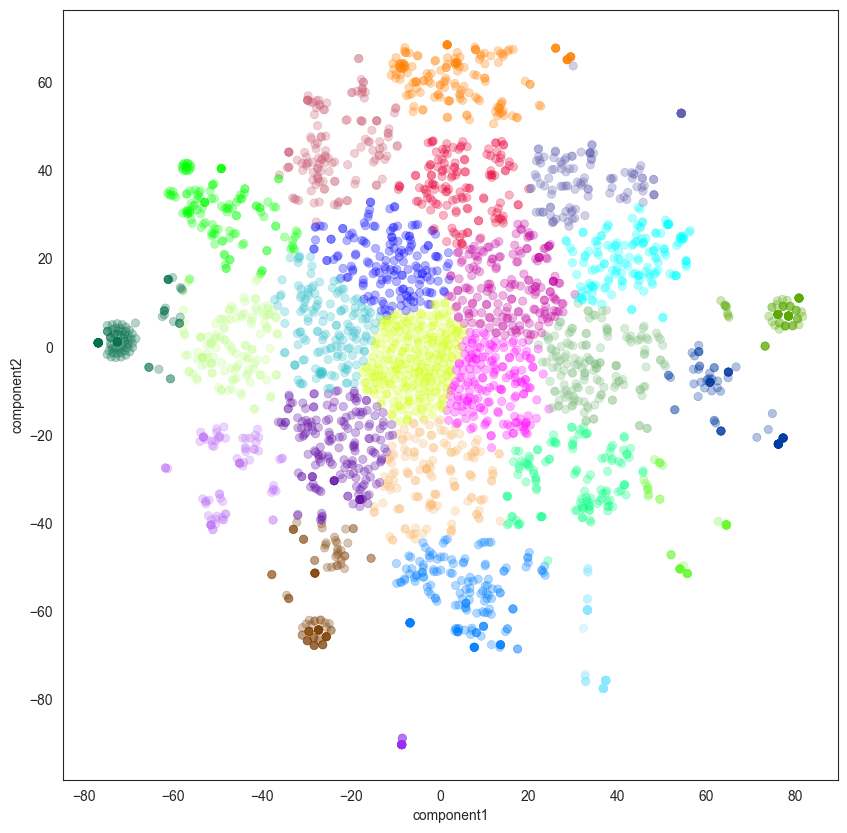

In [23]:
#CLUST: KMEANS
o_least1_model1.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_least1_model1.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter_amount=0.01, hide_labels=False, hide_legend=False, save=False)

## VAR2: o_like1

In [33]:
# DIM_REDU: TSNE
o_like_model1 = NLP(data_clean['o_like1'].iloc[:], embedding_model=modelGN300, model_name='o_like_model1')
o_like_model1.dimension_reduce('tsne', perplexity=20)

Seeds have been reset to: 42
4990 total samples
Successfully Tokenized
Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE


Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 30
Silhouette coefficient: 0.44
Inertia: 631802.750
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

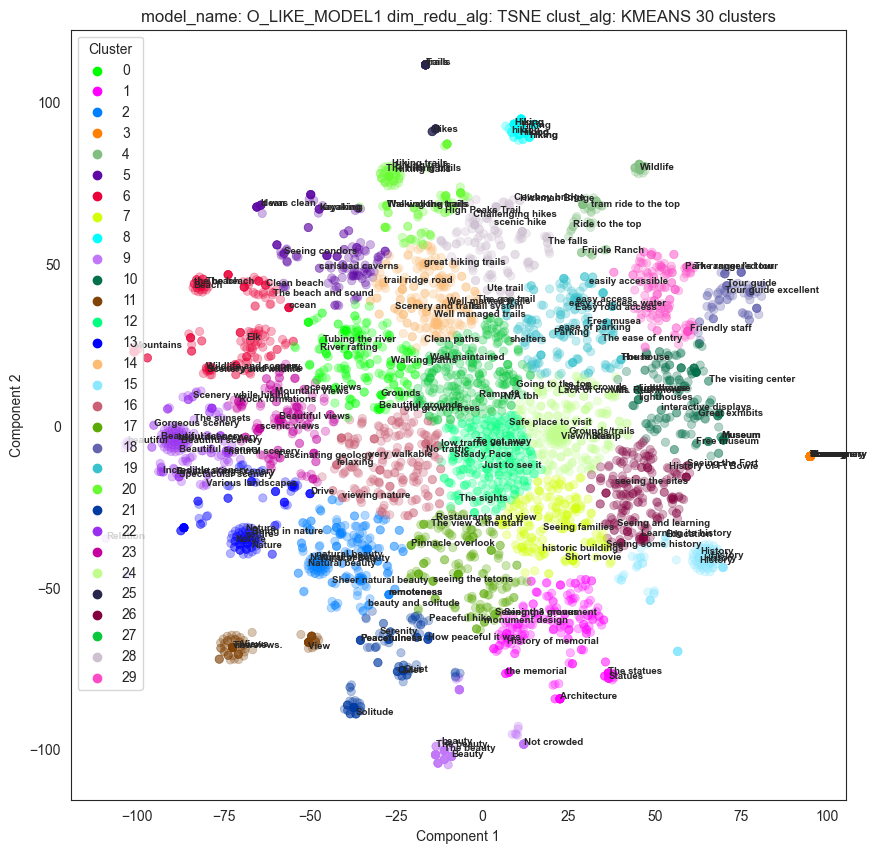

In [34]:
#CLUST: KMEANS
o_like_model1.clusterize(cluster_algorithm='kmeans', num_clusters=30)
o_like_model1.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter_amount=0.01, hide_labels=False, hide_legend=False)

## VAR3: o_subjects

In [35]:
# DIM_REDU: TSNE
o_subjects_model1 = NLP(data_clean['o_subjects'].iloc[:], embedding_model=modelGN300, model_name='o_subjects_model1')
o_subjects_model1.dimension_reduce('tsne', perplexity=20)

Seeds have been reset to: 42
1560 total samples
Successfully Tokenized
Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE


In [36]:
o_subjects_model1.datapoints

component1  component2  \
0      28.814920  -29.311815   
1      46.484219    3.429324   
2     -22.357780   -2.977795   
3      25.445204  -20.653494   
4      -0.473077   16.282730   
...          ...         ...   
1555   -8.072624   15.309994   
1556  -48.772964    8.866742   
1557   39.593124    2.559022   
1558    8.708261    5.926771   
1559  -48.772964    8.866742   

                                               sentance  orig_index  
0                                         Hiking trails          11  
1                                   Animals in the area          27  
2     Include history of inhabitants and overland st...          34  
3      Trails to hike \nArea geology \nPhotography tips          56  
4     Historical significance and more in depth revi...          59  
...                                                 ...         ...  
1555  history of the settlement and towns along the ...       19795  
1556                                      Indian mounds       19802  
1557                           Native plants. Wildlife.       19814  
1558  Waterfalls and Springs and swamp areas (it rai...       19823  
1559                                      Indian Mounds       19826  

[1560 rows x 4 columns]

Seeds have been reset to: 42


Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.40
Inertia: 78018.281
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

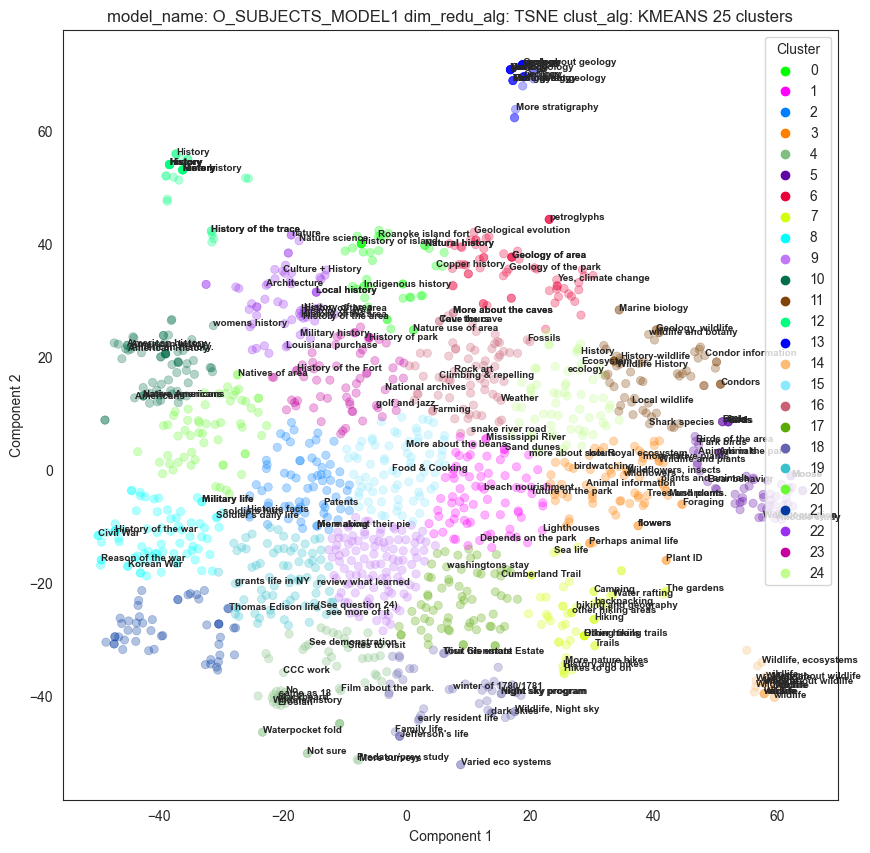

In [37]:
#CLUST: KMEANS
o_subjects_model1.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_subjects_model1.generate_cluster_graph(figsize=(10,10), num_annotations = 200, max_char_length=20, jitter = False, jitter_amount=2, hide_labels=False, hide_legend=False)

In [38]:
# DIM_REDU: TSNE
o_subjects_model2 = NLP(data_clean['o_subjects'].iloc[:], embedding_model=modelGN300, model_name='o_subjects_model2')
o_subjects_model2.dimension_reduce('spectral_emb', perplexity=20)

Seeds have been reset to: 42
1560 total samples
Successfully Tokenized
Seeds have been reset to: 42
Reduced dimensions to 2 using SPECTRAL_EMB


Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.41
Inertia: 0.000
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

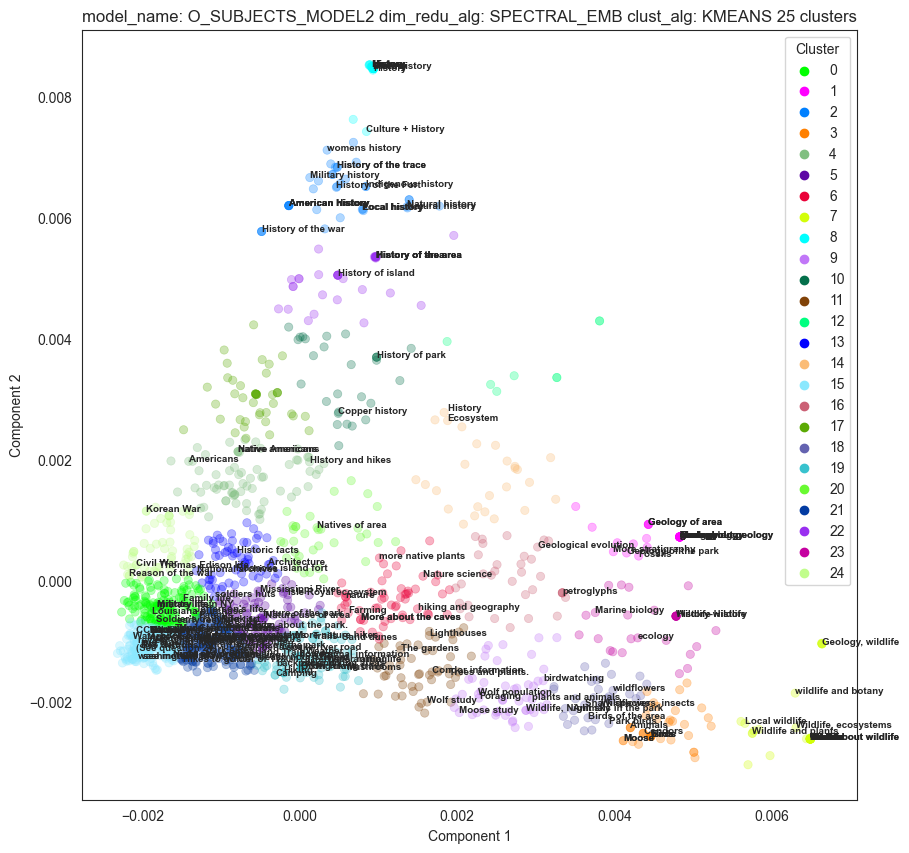

In [39]:
#CLUST: KMEANS
o_subjects_model2.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_subjects_model2.generate_cluster_graph(figsize=(10,10), num_annotations = 200, max_char_length=20, jitter = False, jitter_amount=2, hide_labels=False, hide_legend=False)

## VAR4: o_addl

In [40]:
# DIM_REDU: TSNE
o_addl_model1 = NLP(data_clean['o_addl'].iloc[:], embedding_model=modelGN300, model_name='o_addl_model1')
o_addl_model1.dimension_reduce('tsne', perplexity=50)

Seeds have been reset to: 42
2281 total samples
Successfully Tokenized
Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE


Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.36
Inertia: 48175.184
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

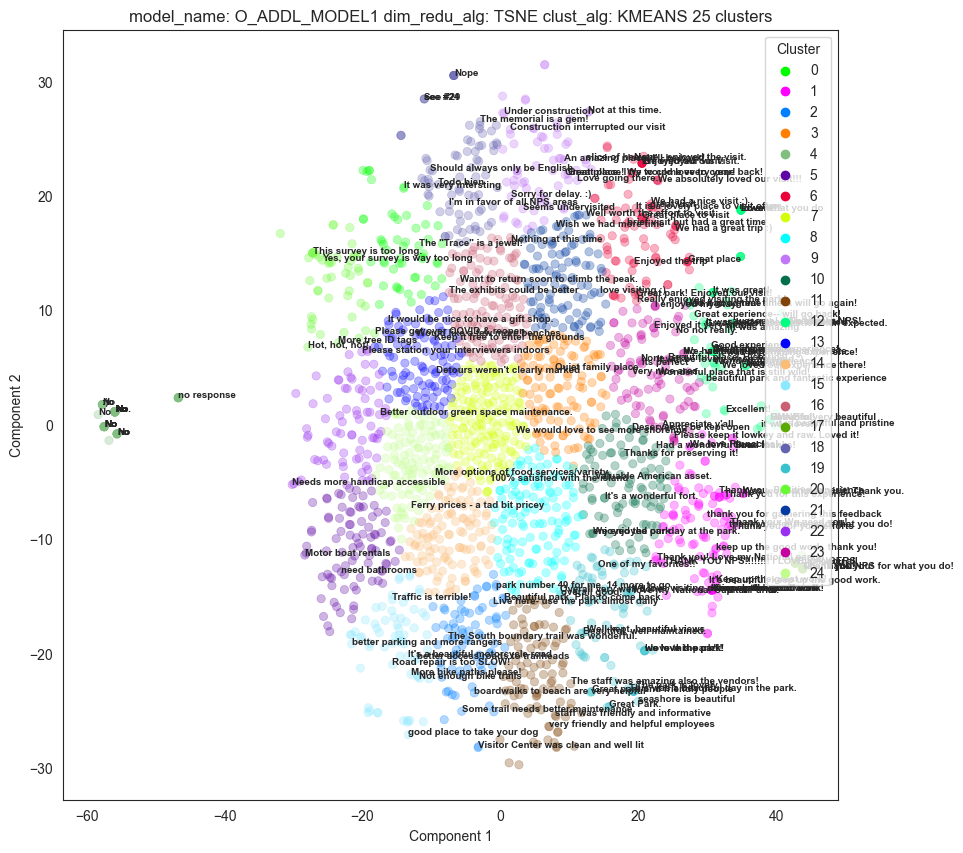

In [41]:
#CLUST: KMEANS
o_addl_model1.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_addl_model1.generate_cluster_graph(figsize=(10,10), num_annotations = 200, max_char_length=40, jitter = False, jitter_amount=2, hide_labels=False, hide_legend=False)

In [42]:
# DIM_REDU: TSNE
o_addl_model2 = NLP(data_clean['o_addl'].iloc[:], embedding_model=modelGN300, model_name='o_addl_model2')
o_addl_model2.dimension_reduce('spectral_emb', perplexity=50)

Seeds have been reset to: 42
2281 total samples
Successfully Tokenized
Seeds have been reset to: 42
Reduced dimensions to 2 using SPECTRAL_EMB


Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.37
Inertia: 0.000
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

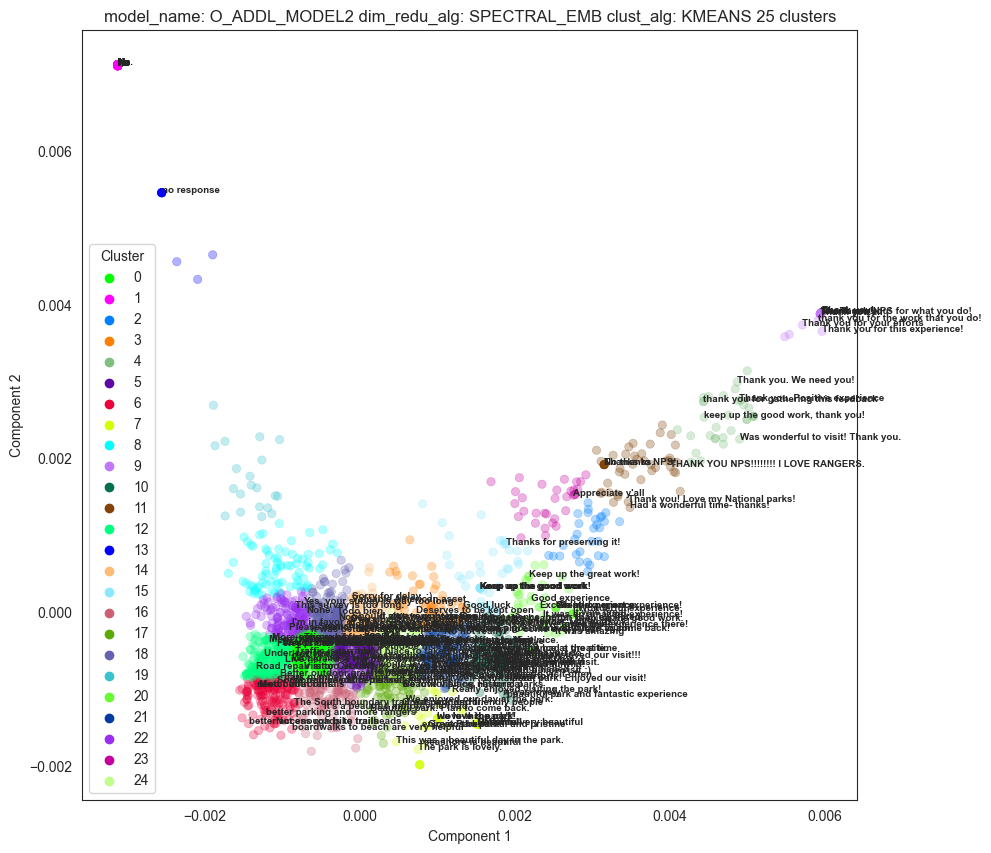

In [43]:
#CLUST: KMEANS
o_addl_model2.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_addl_model2.generate_cluster_graph(figsize=(10,10), num_annotations = 200, max_char_length=40, jitter = False, jitter_amount=2, hide_labels=False, hide_legend=False)

In [44]:
df_1 = o_addl_model1.get_cluster_info(4)
print(df_1.shape)
df_1

(86, 7)


component1  component2     sentance  orig_index  cluster  \
22    -55.898151    1.129889        No :)         149        4   
30    -55.898151    1.129889           No         202        4   
35    -46.702496    2.357806  no response         253        4   
38    -46.702496    2.357806  no response         270        4   
42    -46.702496    2.357806  no response         297        4   
...          ...         ...          ...         ...      ...   
2223  -57.454487   -0.173223           No       19507        4   
2230  -57.454487   -0.173223           No       19569        4   
2247  -57.717838    1.752908           no       19637        4   
2271  -57.717838    1.752908           No       19762        4   
2278  -57.454487   -0.173223           No       19821        4   

             colorCode  alpha  
22    (0.5, 0.75, 0.5)    0.3  
30    (0.5, 0.75, 0.5)    0.3  
35    (0.5, 0.75, 0.5)    0.3  
38    (0.5, 0.75, 0.5)    0.3  
42    (0.5, 0.75, 0.5)    0.3  
...                ...    ...  
2223  (0.5, 0.75, 0.5)    0.3  
2230  (0.5, 0.75, 0.5)    0.3  
2247  (0.5, 0.75, 0.5)    0.3  
2271  (0.5, 0.75, 0.5)    0.3  
2278  (0.5, 0.75, 0.5)    0.3  

[86 rows x 7 columns]

# Interesting Cluster Notes

cluster# (themes) #of_responses

### o_least1_model1
- 19 (crowds) 84
- 5 (limited parking / crowding) 159
- 14 (busy / traffic) 83
- 18 (nothing to dislike) 93
- 1 (covid measures / timed entry) 86
- 15 (lack of cell service / wifi)  119
- 6 (mosquitos / bugs) 40
- 16 (didn't have enough time / loved everything) 175

### o_like_model1
- 8 (hiking) 127
- 20 (hiking trails) 129
- 25 (hikes / trails) 52
- 13 (nature) 139
- 11 (views) 101
- 1 (memorials / architecture / statues) 212
- 18 (tours / guides) 82
- 21 (solitude / quietness) 134
- 10 (visitor centers / exhibits / videos / museums) 175
- 2 (natural beauty) 200
- 3 (scenery) 346

### o_subjects_model1
- 12 (history) 41
- 10 (american history / heritage) 66
- 8 ('war related information') 77
- 14 (wildlife) 29
- 13 (geology) 34

### o_addl_model1
- 17 (thank you!) 32
- 4 (no) 86
- 20 ('survey related') 51
- 1 ('positive feedback regarding survey work') 114
- 6 (enjoyed visit) 94
    

## Saving Data

### Models

In [22]:
# 
# models_data = merge_model_data(models = [o_least1_model1, o_like_model1, o_subjects_model1, o_subjects_model2, o_addl_model1, o_addl_model2])

# save_data(models_data, 'models_data')

Saving Data(.parquet)...
Saving Data(.xlsx)...
SUCCESS: models_data Data Saved.


# FOR DOCUMENTATION PURPOSES

(3293, 300) (3293, 7)


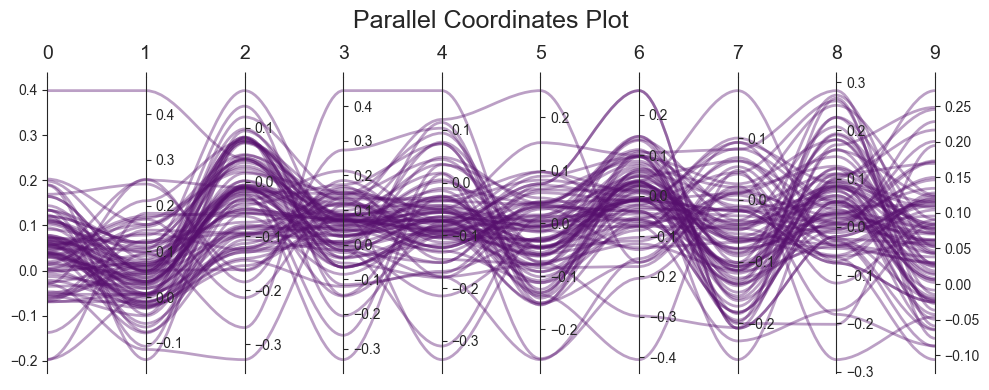

In [14]:
# data.loc[(data['cluster'] == 15) | (data['cluster'] == 6)].sort_values(by='cluster').head(100)
test = pd.DataFrame(o_least1_model1.vectorized_docs)
test2 = o_least1_model1.datapoints
print(test.shape, test2.shape)
test2 = test2[(test2['cluster'] == 1)].reset_index(drop=True)
test2 = test2.loc[0:100]
test = test.loc[test2.index, 0:9].reset_index(drop=True)
test2


from matplotlib.path import Path
import matplotlib.patches as patches
ynames = test.columns
ys = test
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05

# ymaxs[1], ymins[1] = ymins[1], ymaxs[1]  # reverse axis 1 to have less crossings
# dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys.iloc[:, 0]
zs[:, 1:] = (ys.iloc[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

fig, host = plt.subplots(figsize=(10,4))

axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot', fontsize=18, pad=12)

colors = [plt.cm.inferno(index) for index in np.linspace(0, 1, 5)]

legend_handles = [None for _ in np.arange(0, max(test2.cluster) + 1)]
for j in range(ys.shape[0]):
    # create bezier curves
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=2, alpha=0.4, edgecolor=colors[test2.cluster[j]])
    legend_handles[test2.cluster.to_numpy()[j]] = patch
    host.add_patch(patch)
# host.legend(legend_handles, np.unique(test2.cluster.astype('<U10')),
#             loc='lower center', bbox_to_anchor=(0.5, -0.18),
#             ncol=len(test2.cluster), fancybox=True, shadow=True)
plt.tight_layout()
plt.show()
fig.savefig(r'..\Writeup Files/parallel_coord_plot.png', transparent=True)

Seeds have been reset to: 42
2 total samples
Successfully Tokenized


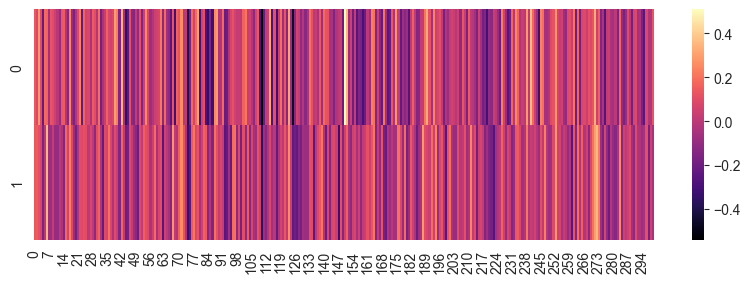

In [8]:
# test_data = pd.Series(['like want'])
test_data = pd.Series('hate want'.split())
test = NLP(test_data, embedding_model=modelGN300, model_name='test')
test.tokenized_docs
vecs = pd.DataFrame(test.vectorized_docs)
plt.figure(figsize=(10, 3), dpi=100)
sns.heatmap(vecs[vecs.columns[:]], linewidth=0, cmap='magma')

Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

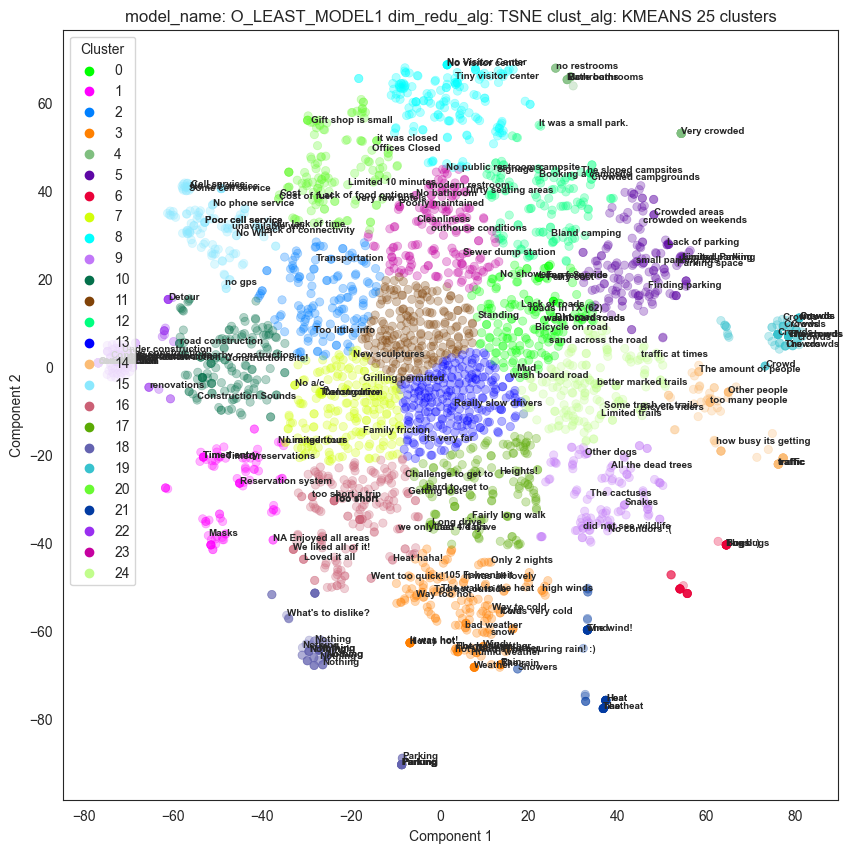

Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

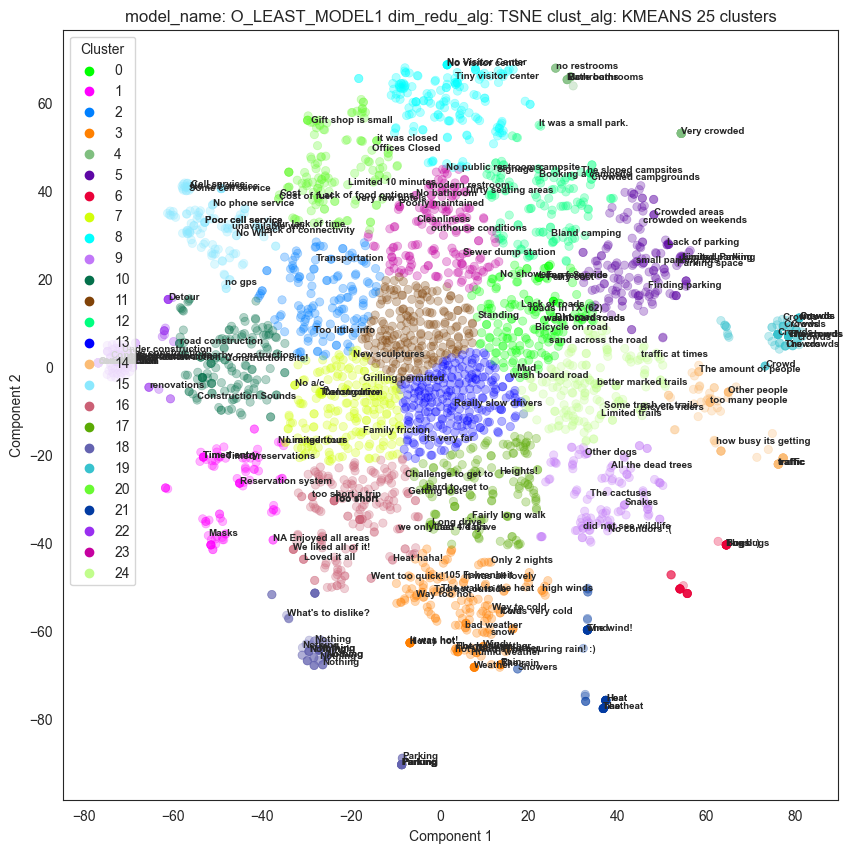

AttributeError: 'NoneType' object has no attribute 'savefig'

In [13]:
o_least1_model1.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter_amount=0.01, hide_labels=False, hide_legend=False)
data = o_least1_model1.datapoints

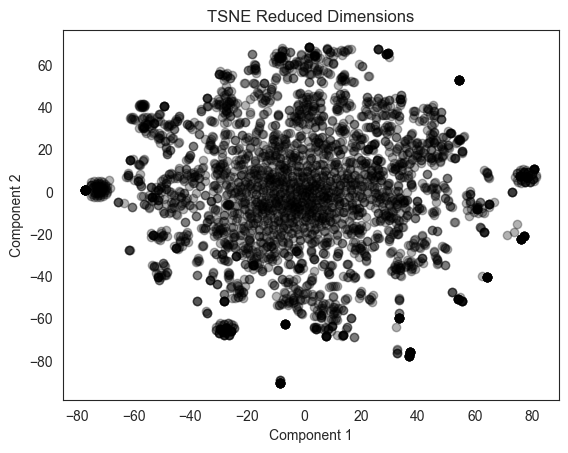

In [23]:
fig = plt.figure()
plt.scatter(data['component1'], data['component2'], color='black', alpha=0.3)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('TSNE Reduced Dimensions')
plt.show()
fig.savefig(r'..\Writeup Files/reduced_dim.png', transparent=True)

In [7]:
data_sorted = data.loc[(data['cluster'] == 15) | (data['cluster'] == 6)].sort_values(by='cluster').head(100)
print(data_sorted.shape)
data_sorted.head(50)

(100, 7)


component1  component2  \
2846   64.437859  -40.464722   
2982   64.437859  -40.464722   
2966   53.998444  -50.451782   
2945   53.998444  -50.451782   
2935   53.998444  -50.451782   
2925   53.998444  -50.451782   
2917   53.998444  -50.451782   
2861   64.437859  -40.464722   
798    53.998444  -50.451782   
2844   64.437859  -40.464722   
2839   62.588673  -39.674862   
874    55.652542  -51.495609   
2702   64.437859  -40.464722   
2622   55.652542  -51.495609   
2207   64.437859  -40.464722   
1580   64.437859  -40.464722   
1572   53.998444  -50.451782   
1564   64.437859  -40.464722   
1553   64.437859  -40.464722   
1546   64.437859  -40.464722   
1516   55.652542  -51.495609   
1338   55.652542  -51.495609   
1392   64.437859  -40.464722   
1416   53.998444  -50.451782   
2997   64.437859  -40.464722   
3014   64.437859  -40.464722   
1437   64.437859  -40.464722   
3144   53.998444  -50.451782   
496    54.780502  -49.726303   
357    51.995094  -47.234631   
3037   64.437859  -40.464722   
451    64.437859  -40.464722   
3054   52.064228  -47.326836   
327    55.652542  -51.495609   
318    64.437859  -40.464722   
415    55.652542  -51.495609   
359    51.981304  -47.227440   
337    53.998444  -50.451782   
3181   64.437859  -40.464722   
407    55.652542  -51.495609   
1517  -49.216988   40.438171   
1527  -56.392120   30.793079   
3166  -57.759155   41.401951   
3176  -54.522091   34.362148   
1977  -36.963791   27.360275   
3205  -56.909061   30.924763   
3206  -53.848419   30.184084   
3019  -45.342762   33.566044   
1507  -49.216988   40.438171   
2123  -57.379646   40.909534   

                                               sentance  orig_index  cluster  \
2846                                           The bugs       15665        6   
2982                                           The bugs       16915        6   
2966                                          mosquitos       16796        6   
2945                                          mosquitos       16608        6   
2935                                          mosquitos       16574        6   
2925                                          mosquitos       16476        6   
2917                                          mosquitos       16395        6   
2861                                               Bugs       15756        6   
798                                           mosquitos        2841        6   
2844                                              Bugs!       15652        6   
2839                                        Bugs, flies       15620        6   
874                                          Mosquitoes        3144        6   
2702                                               Bugs       14601        6   
2622                                         Mosquitoes       13937        6   
2207                                           The bugs       11401        6   
1580                                               bugs        6470        6   
1572                                          mosquitos        6392        6   
1564                                               Bugs        6336        6   
1553                                               Bugs        6289        6   
1546                                               bugs        6262        6   
1516                                         Mosquitoes        6070        6   
1338                                         Mosquitoes        5272        6   
1392                                             (Bugs)        5471        6   
1416                                          Mosquitos        5598        6   
2997                                               Bugs       17044        6   
3014                                               bugs       17180        6   
1437                                               bugs        5692        6   
3144                                          Mosquitos       18773        6   
496                                           Mosquit

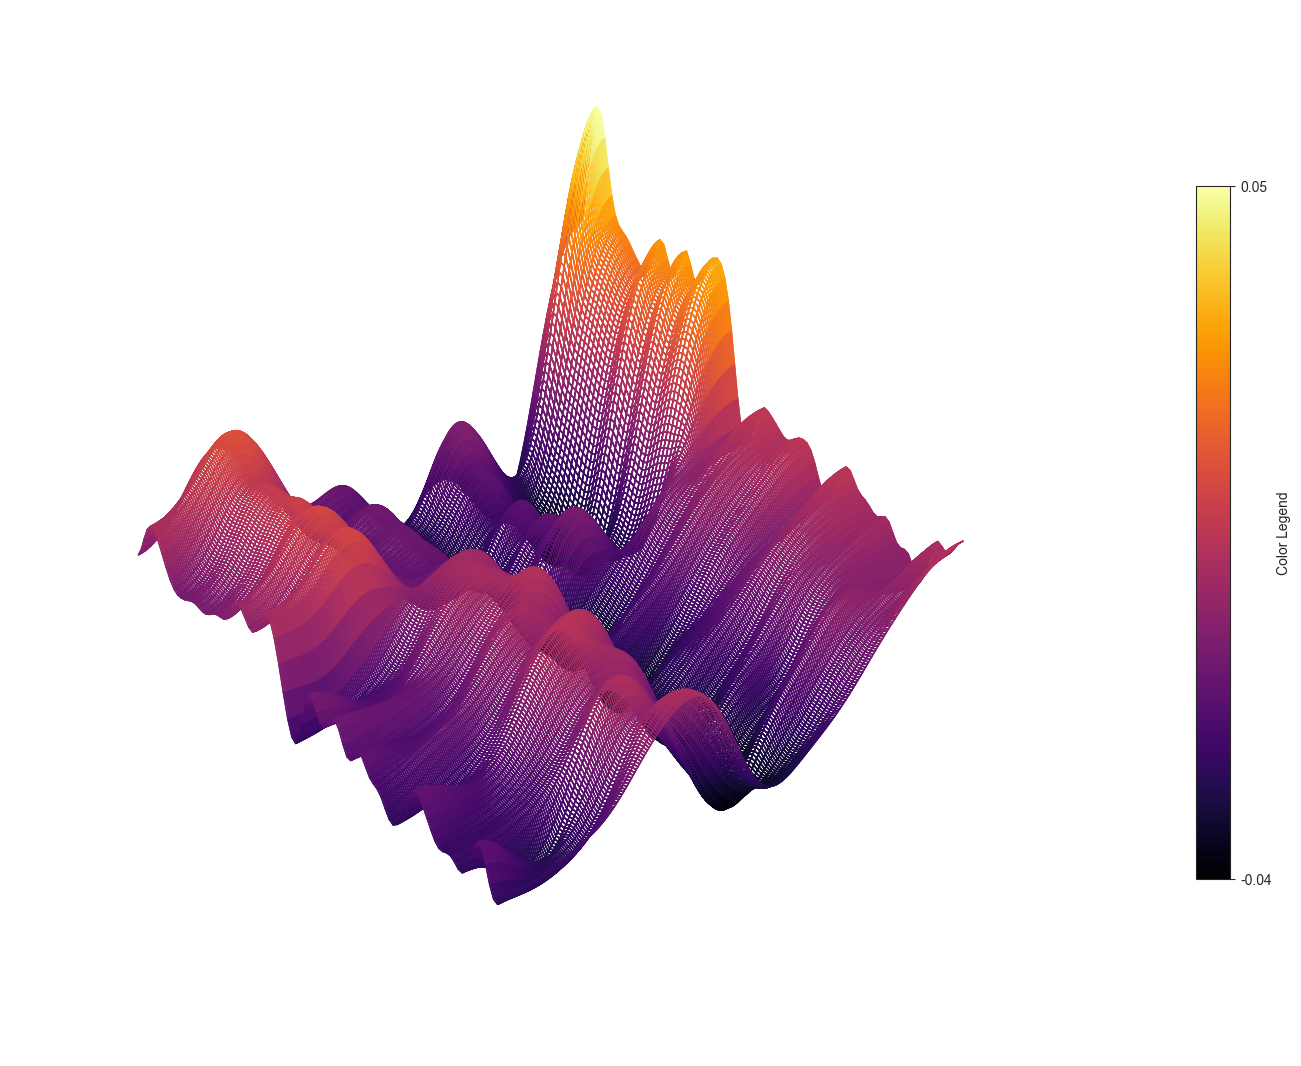

In [8]:
from scipy.ndimage.filters import gaussian_filter
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

start = 1800
end = 1850
length = end - start

def curveF(x1, x2):
       return 0.5 * x1 + 0.6 * x2 + 0.2 * x1 * x1 + 0.1 * x1 * x2 + 0.3 * x2 * x2 + 4

vecs = pd.DataFrame(o_least1_model1.vectorized_docs)
vecs = vecs.loc[data_sorted.index]
# vecs = vecs.iloc[start:end][:]

X = np.arange(vecs.shape[0])
Y = np.arange(vecs.shape[1])
X, Y = np.meshgrid(X, Y)

vecs = vecs.T.apply(lambda row: gaussian_filter(row, sigma=20)).T
vecs = pd.DataFrame(gaussian_filter(vecs, sigma=2))
# Z = pd.DataFrame(np.zeros((vecs.shape[0], vecs.shape[1]))).to_numpy().T
Z = vecs.to_numpy().T
# xz = np.linspace(-5, 5, vecs.shape[0])
# yz = np.linspace(-5, 5, vecs.shape[1])
# xz, yz = np.meshgrid(xz, yz)
# amplitude = 0.01
# Z = amplitude * np.sin(np.sqrt(xz**2 + yz**2))
# Z = curveF(xz, yz)

C = vecs.to_numpy().T
scamap = plt.cm.ScalarMappable(cmap='inferno')
fcolors = scamap.to_rgba(C)
rcount, ccount, _ = fcolors.shape

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.plot_surface(X, Y, Z, cmap='inferno', antialiased = True, alpha=1, rstride=5, cstride=5, edgecolor="black", linewidth=0.5)

surf = ax.plot_surface(X, Y, Z, facecolors=fcolors, shade=False, rcount=rcount, ccount=ccount)
surf.set_facecolor((0,0,0,0))

# ax.plot_surface(X, Y, Z, facecolors=fcolors, antialiased = True, rstride=5, cstride=5)
# ax.plot_wireframe(X, Y, Z, color ='black', rstride=10, cstride=10)
# ax.plot_surface(X, Y, Z, facecolors=fcolors, antialiased = True)
# ax.plot_wireframe(X, Y, Z, color ='black')

fig.set_figwidth(18)
fig.set_figheight(18)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
ax.view_init(35, -40)
ax.set_axis_off()
ax.set_facecolor((1, 1, 1))

# Create the scatter plot
surf = ax.plot_surface(X, Y, Z, facecolors=fcolors, shade=False, rcount=rcount, ccount=ccount)
surf.set_facecolor((0,0,0,0))

# Calculate the min and max values of the plot
plot_min = np.min(Z)
plot_max = np.max(Z)

# Add a color bar as a legend
scamap.set_array([])
cbar = plt.colorbar(scamap, ax=ax, shrink=0.5, orientation='vertical', pad=0.1, aspect=20, ticks=[plot_min, plot_max])
cbar.set_label('Color Legend')
cbar.ax.set_yticklabels([f'{plot_min:.2f}', f'{plot_max:.2f}'])

plt.show()
fig.savefig(r'..\Writeup Files/clothTrans.png', transparent=True)

<Axes: >

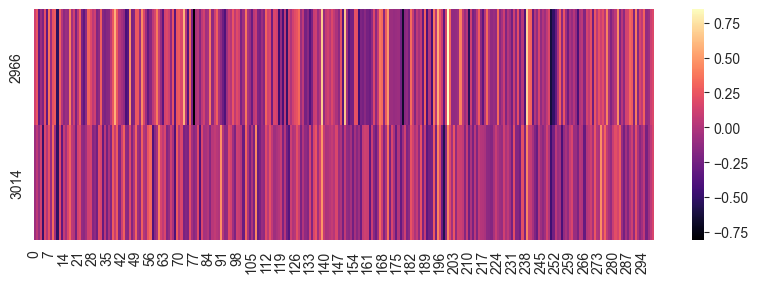

In [387]:
vecs = pd.DataFrame(o_least1_model1.vectorized_docs)
vecs = vecs.loc[data_sorted.index]

plt.figure(figsize=(10, 3), dpi=100)
sns.heatmap(vecs.loc[[2966, 3014]], linewidth=0, cmap='magma')